In this notebook, I test the apparent source calculation.

In [1]:
cd ../../

/home/noahb/fv3net


In [2]:
import xarray as xr
from src.data.advect import *
from src.data import open_data
import os

data_3d = open_data()
ds = data_3d.isel(time=slice(0,1), grid_xt=slice(0, 256)).persist()

# Test advection

v.grad(z) = w

In [4]:
dz = advection_fixed_height(ds, 'z')

ds['gradz'] = dz.persist()

In [5]:
df  =ds[['gradz', 'w']].to_dataframe()
df['gradz'] = - df.gradz

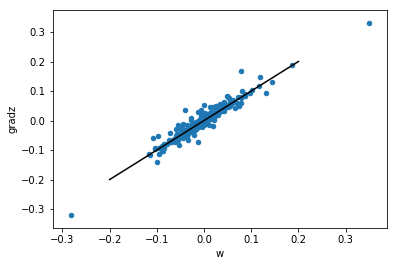

In [6]:
df.sample(1000).plot(kind='scatter', x='w', y='gradz')
xlim = [-.2, .2]
plt.plot(xlim, xlim, c='k')

# Test Storage

should be zero 

In [7]:
ds = data_3d.isel(grid_xt=slice(0, 256)).persist()
phi = np.log(ds.z/30000+1)
storage = storage_fixed_height(phi, ds.z).dropna('time')

In [8]:
storage.std().compute()

<xarray.DataArray 'z' ()>
array(2.667967e-10, dtype=float32)

In [9]:
storage.mean().compute()

<xarray.DataArray 'z' ()>
array(-1.235006e-11, dtype=float32)

This shows that the storage is nearly identically zero.

In [10]:
dt = 1
count= xr.DataArray(np.r_[:4]*dt, dims=['time'])
phi = np.log(ds.z/30000+1) + count
storage = storage_fixed_height(phi, ds.z, dt=dt).dropna('time')
storage

<xarray.DataArray (time: 3, grid_yt: 768, grid_xt: 256, pfull: 79)>
dask.array<shape=(3, 768, 256, 79), dtype=float64, chunksize=(1, 256, 256, 79)>
Coordinates:
  * time     (time) object 2016-08-01 03:00:00 ... 2016-08-01 09:00:00
  * grid_xt  (grid_xt) float32 0.1171875 0.3515625 ... 59.648438 59.882812
  * grid_yt  (grid_yt) float32 -89.88281 -89.64844 ... 89.64844 89.88281
  * pfull    (pfull) float32 4.5137978 8.300872 12.451992 ... 994.3374 998.2764

In [11]:
avg_dims = ['grid_yt', 'grid_xt', 'pfull']

In [12]:
storage.mean(avg_dims).compute()

<xarray.DataArray (time: 3)>
array([1., 1., 1.])
Coordinates:
  * time     (time) object 2016-08-01 03:00:00 ... 2016-08-01 09:00:00

In [13]:
storage.std(avg_dims).compute()

<xarray.DataArray (time: 3)>
array([2.199661e-06, 3.205983e-06, 3.126552e-06])
Coordinates:
  * time     (time) object 2016-08-01 03:00:00 ... 2016-08-01 09:00:00

This shows that the storage calculation is accurate for time varying inputs.